In [241]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

-

Settings

train = 0 </br>
valid = 3 </br>
test = 1 </br>
test' = 2 </br>

In [243]:
# Тип выборки
MODE = 2
# Номер переменной
VAR = 8
# Число кластеров с наименьшей MAE на рассмотрение
TOP = 5
# Длина участка визуализации
LEN = 50

-

In [244]:
data = pd.read_csv("./output_table4.csv")
data = data[data["mode"].astype("int") == MODE]

In [245]:
data.loc[:, ["real 0", "real 64", "real 8", "predicted 0", "predicted 8", "predicted 64", "cluster_num", "mode"]]

,real 0,real 64,real 8,predicted 0,predicted 8,predicted 64,cluster_num,mode
23867,586.445672,6345.944280,205.378940,66.527641,35.853764,522.579102,3.0,2.0
23868,586.445672,6345.763636,206.256066,66.527641,35.756313,522.559387,3.0,2.0
23869,586.445672,6345.619704,204.238425,66.527641,35.904987,522.544495,3.0,2.0
23870,586.445672,6345.526343,203.931981,66.527641,35.563000,522.532654,3.0,2.0
23871,586.445672,6345.434683,202.669849,66.527641,35.511055,522.525024,3.0,2.0
...,...,...,...,...,...,...,...,...
326461,267.788081,6131.059745,38.331893,82.397858,45.032555,532.827087,2.0,2.0
326462,267.788081,6131.079479,38.243897,82.397858,45.298462,532.843628,2.0,2.0
326463,267.788081,6131.071585,38.020741,82.397858,45.227032,532.845337,2.0,2.0
326464,267.788081,6131.579556,38.368011,82.397858,45.045883,532.844666,2.0,2.0


Оценим переменные

In [246]:
real = [x for x in data.columns if "real" in x]
predicted = [x for x in data.columns if "predicted" in x]
err = abs(data[real].values - data[predicted].values)
err = err[data["mode"] == MODE]
pd.DataFrame([dict(zip(real, err.mean(axis=0)))]).T.sort_values(0)[:10]

,0
real 35,12.549801
real 13,13.055562
real 8,15.852575
real 12,17.916757
real 37,25.828963
real 33,31.030724
real 26,39.554185
real 63,43.493799
real 29,48.086988
real 14,48.108777


In [247]:
data["mode"].value_counts()

2.0    65292
Name: mode, dtype: int64

In [248]:
AE = abs(data[f"real {VAR}"] - data[f"predicted {VAR}"])
AE = pd.DataFrame(dict(AE=AE, cluster_num=data["cluster_num"]))

In [249]:
AE

,AE,cluster_num
23867,169.525176,3.0
23868,170.499753,3.0
23869,168.333438,3.0
23870,168.368981,3.0
23871,167.158794,3.0
...,...,...
326461,6.700662,2.0
326462,7.054565,2.0
326463,7.206291,2.0
326464,6.677872,2.0


In [250]:
top = [AE[AE["cluster_num"] == c]["AE"].mean() for c in np.arange(AE["cluster_num"].max())]
top = np.argsort(top)

In [251]:
top

array([5, 1, 2, 0, 4, 3])

-

# Визуализация

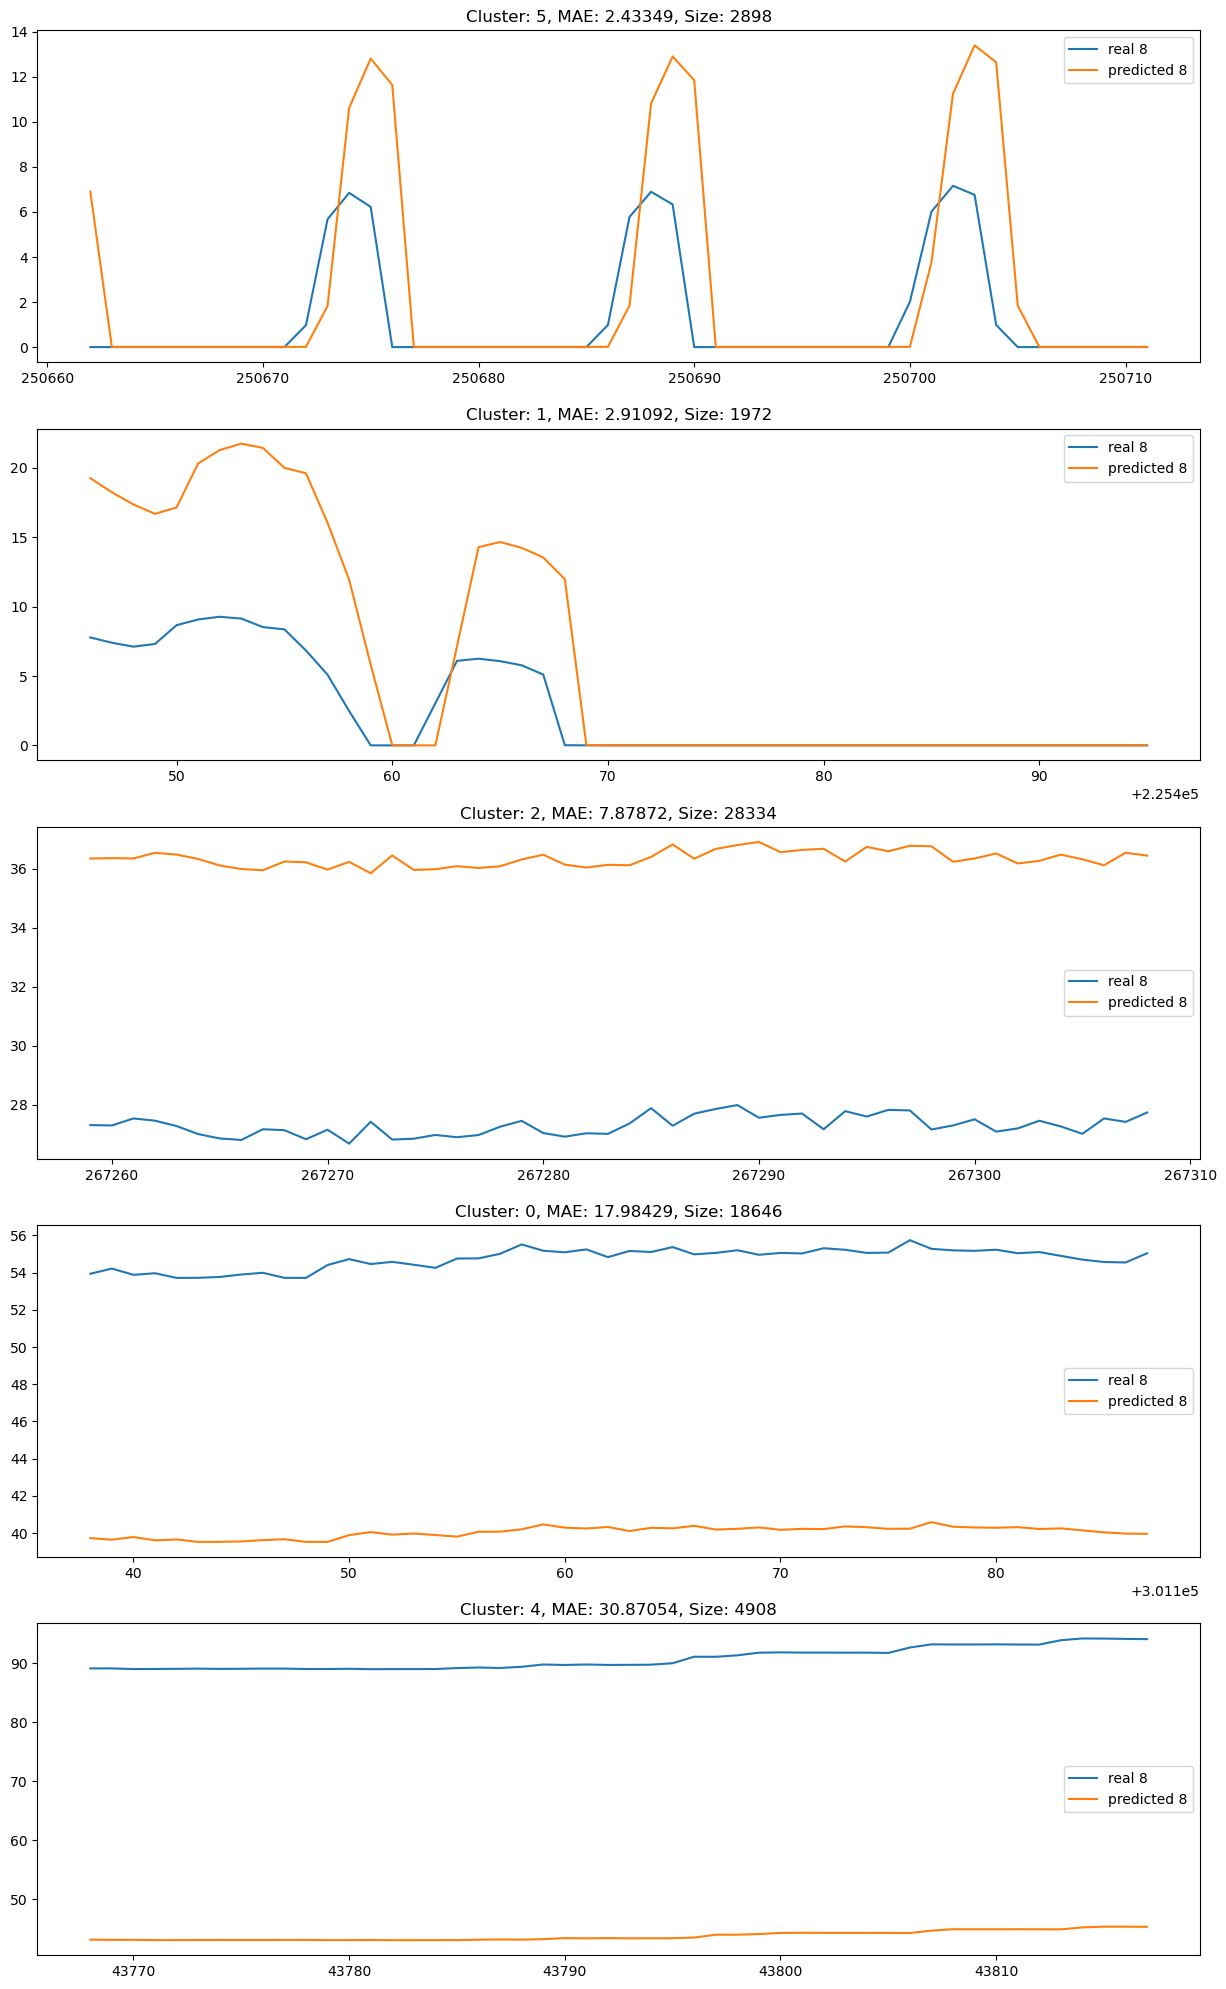

In [252]:
for i in range(TOP):
    #print(int(f"{i+1}1{TOP}"))
    plt.subplot(int(f"{TOP}1{i+1}"))
    index = AE["cluster_num"] == top[i]
    plt.title(f"Cluster: {top[i]}, MAE: {AE[index]['AE'].mean():.5f}, Size: {sum(AE['cluster_num'] == top[i])}")
    cluster = data[[f"real {VAR}", f"predicted {VAR}"]][index]
    
    # find continous index
    cont = np.split(cluster, np.where(np.diff(cluster.index) > 1)[0] + 1)
    chunk = [x for x in cont if len(x) > LEN][0]
    start = LEN * 2 // 5
    plt.plot(chunk[start:start+LEN])
    plt.legend(chunk.columns)
    
plt.gcf().set_size_inches(15, 5 * TOP)
# plt.savefig("top_clusters_visualize.png")
plt.show()